In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Read Data
df_ekko = pd.read_excel('../Data1/EKKO.XLSX')

In [4]:
df_ekko.head(4)

,EBELN,BUKRS,BSTYP,BSART,BSAKZ,LOEKZ,STATU,AEDAT,ERNAM,PINCR,LPONR,LIFNR,SPRAS,ZTERM,ZBD1T,ZBD2T,ZBD3T,ZBD1P,ZBD2P,EKORG,EKGRP,WAERS,WKURS,KUFIX,BEDAT,KDATB,KDATE,BWBDT,ANGDT,BNDDT,GWLDT,AUSNR,ANGNR,IHRAN,IHREZ,VERKF,TELF1,LLIEF,KUNNR,KONNR,ABGRU,AUTLF,WEAKT,RESWK,LBLIF,INCO1,INCO2,KTWRT,SUBMI,KNUMV,KALSM,STAFO,LIFRE,EXNUM,UNSEZ,LOGSY,UPINC,STAKO,FRGGR,FRGSX,FRGKE,FRGZU,FRGRL,LANDS,LPHIS,ADRNR,STCEG_L,STCEG,ABSGR,ADDNR,KORNR,MEMORY,PROCSTAT,RLWRT,REVNO,SCMPROC,REASON_CODE,MEMORYTYPE,RETTP,RETPC,DPTYP,DPPCT,DPAMT,DPDAT,MSR_ID,HIERARCHY_EXISTS,THRESHOLD_EXISTS,LEGAL_CONTRACT,DESCRIPTION,RELEASE_DATE,VSART,HANDOVERLOC,SHIPCOND,FORCE_ID,FORCE_CNT,RELOC_ID,RELOC_SEQ_ID,POHF_TYPE,EQ_EINDT,EQ_WERKS,FIXPO,EKGRP_ALLOW,WERKS_ALLOW,CONTRACT_ALLOW,PSTYP_ALLOW,FIXPO_ALLOW,KEY_ID_ALLOW,AUREL_ALLOW,DELPER_ALLOW,EINDT_ALLOW,OTB_LEVEL,OTB_COND_TYPE,KEY_ID,OTB_VALUE,OTB_CURR,OTB_RES_VALUE,OTB_SPEC_VALUE,SPR_RSN_PROFILE,BUDG_TYPE,OTB_STATUS,OTB_REASON,CHECK_TYPE,CON_OTB_REQ,CON_PREBOOK_LEV,CON_DISTR_LEV
0,4500000000,FF,F,NB,NaN,NaN,B,2021-01-25,F3,10,60,V01,EN,1,0,0,0,0,0,FF,100,EUR,1.0,NaN,2021-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1000000000,RM0000,SAP,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,DE,NaN,NaN,DE,NaN,0,NaN,NaN,NaN,2,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4500000001,FF,F,NB,NaN,NaN,B,2021-01-25,F3,10,40,V02,EN,1,0,0,0,0,0,FF,200,EUR,1.0,NaN,2021-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1000000001,RM0000,SAP,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,DE,NaN,NaN,DE,NaN,0,NaN,NaN,NaN,2,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4500000002,DD,F,NB,NaN,NaN,B,2021-01-25,D3,10,60,V01,EN,1,0,0,0,0,0,DD,100,EUR,1.0,NaN,2021-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1000000002,RM0000,SAP,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,DE,NaN,NaN,DE,NaN,0,NaN,NaN,NaN,2,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4500000003,DD,F,NB,NaN,NaN,B,2021-01-25,D3,10,20,V02,EN,1,0,0,0,0,0,DD,200,EUR,1.0,NaN,2021-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1000000003,RM0000,SAP,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,DE,NaN,NaN,DE,NaN,0,NaN,NaN,NaN,2,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_ekpo = pd.read_excel('../Data1/EKPO.XLSX')

In [6]:
df_ekpo.head(4)

,EBELN,EBELP,LOEKZ,STATU,AEDAT,TXZ01,MATNR,EMATN,BUKRS,WERKS,LGORT,BEDNR,MATKL,INFNR,IDNLF,KTMNG,MENGE,MEINS,BPRME,BPUMZ,BPUMN,UMREZ,UMREN,NETPR,PEINH,NETWR,BRTWR,AGDAT,WEBAZ,MWSKZ,BONUS,INSMK,SPINF,PRSDR,SCHPR,MAHNZ,MAHN1,MAHN2,MAHN3,UEBTO,UEBTK,UNTTO,BWTAR,BWTTY,ABSKZ,AGMEM,ELIKZ,EREKZ,PSTYP,KNTTP,KZVBR,VRTKZ,TWRKZ,WEPOS,WEUNB,REPOS,WEBRE,KZABS,LABNR,KONNR,KTPNR,ABDAT,ABFTZ,ETFZ1,ETFZ2,KZSTU,NOTKZ,LMEIN,EVERS,ZWERT,NAVNW,ABMNG,PRDAT,BSTYP,EFFWR,XOBLR,KUNNR,ADRNR,EKKOL,SKTOF,STAFO,PLIFZ,NTGEW,GEWEI,TXJCD,ETDRK,SOBKZ,ARSNR,ARSPS,INSNC,SSQSS,ZGTYP,EAN11,BSTAE,REVLV,GEBER,FISTL,FIPOS,KO_GSBER,KO_PARGB,KO_PRCTR,KO_PPRCTR,MEPRF,BRGEW,VOLUM,VOLEH,INCO1,INCO2,VORAB,KOLIF,LTSNR,PACKNO,FPLNR,GNETWR,STAPO,UEBPO,LEWED,EMLIF,LBLKZ,SATNR,ATTYP,VSART,HANDOVERLOC,KANBA,ADRN2,CUOBJ,XERSY,EILDT,DRDAT,DRUHR,DRUNR,AKTNR,ABELN,ABELP,ANZPU,PUNEI,SAISO,SAISJ,EBON2,EBON3,EBONF,MLMAA,MHDRZ,ANFNR,ANFPS,KZKFG,USEQU,UMSOK,BANFN,BNFPO,MTART,UPTYP,UPVOR,KZWI1,KZWI2,KZWI3,KZWI4,KZWI5,KZWI6,SIKGR,MFZHI,FFZHI,RETPO,AUREL,BSGRU,LFRET,MFRGR,NRFHG,J_1BNBM,J_1BMATUSE,J_1BMATORG,J_1BOWNPRO,J_1BINDUST,ABUEB,NLABD,NFABD,KZBWS,BONBA,FABKZ,J_1AINDXP,J_1AIDATEP,MPROF,EGLKZ,KZTLF,KZFME,RDPRF,TECHS,CHG_SRV,CHG_FPLNR,MFRPN,MFRNR,EMNFR,NOVET,AFNAM,TZONRC,IPRKZ,LEBRE,BERID,XCONDITIONS,APOMS,CCOMP,GRANT_NBR,FKBER,STATUS,RESLO,KBLNR,KBLPOS,WEORA,SRV_BAS_COM,PRIO_URG,PRIO_REQ,EMPST,DIFF_INVOICE,TRMRISK_RELEVANT,SPE_ABGRU,SPE_CRM_SO,SPE_CRM_SO_ITEM,SPE_CRM_REF_SO,SPE_CRM_REF_ITEM,SPE_CRM_FKREL,SPE_CHNG_SYS,SPE_INSMK_SRC,SPE_CQ_CTRLTYPE,SPE_CQ_NOCQ,REASON_CODE,CQU_SAR,ANZSN,SPE_EWM_DTC,EXLIN,EXSNR,EHTYP,RETPC,DPTYP,DPPCT,DPAMT,DPDAT,FLS_RSTO,EXT_RFX_NUMBER,EXT_RFX_ITEM,EXT_RFX_SYSTEM,SRM_CONTRACT_ID,SRM_CONTRACT_ITM,BLK_REASON_ID,BLK_REASON_TXT,ITCONS,FIXMG,WABWE,TC_AUT_DET,MANUAL_TC_REASON,FISCAL_INCENTIVE,TAX_SUBJECT_ST,FISCAL_INCENTIVE_ID,SF_TXJCD,/BEV1/NEGEN_ITEM,/BEV1/NEDEPFREE,/BEV1/NESTRUCCAT,ADVCODE,BUDGET_PD,EXCPE,FMFGUS_KEY,IUID_RELEVANT,MRPIND,SGT_SCAT,SGT_RCAT,REFSITE,REF_ITEM,SOURCE_ID,SOURCE_KEY,PUT_BACK,POL_ID,CONS_ORDER
0,4500000000,10,NaN,NaN,2021-01-25,Nuts,FF-R01,FF-R01,FF,FF,NaN,NaN,FF-MANUF,5300000050,NaN,0,41940,KG,KG,1,1,1,1,1.82,1,76330.8,76330.8,NaN,0,NaN,NaN,NaN,B,X,NaN,0,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,X,NaN,0,NaN,NaN,NaN,NaN,X,NaN,X,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaN,NaN,KG,NaN,0,0,0,2021-01-25,F,76330.8,NaN,NaN,NaN,NaN,NaN,SAP,1,0,KG,DE0000000,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FF,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,00:00:00,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,10000004,0,ROH,NaN,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76330.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muesli Contr,CET,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,4500000000,20,NaN,NaN,2021-01-25,Blueberries,FF-R02,FF-R02,FF,FF,NaN,NaN,FF-MANUF,5300000051,NaN,0,14280,KG,KG,1,1,1,1,4.00,1,57120.0,57120.0,NaN,0,NaN,NaN,NaN,B,X,NaN,0,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,X,NaN,0,NaN,NaN,NaN,NaN,X,NaN,X,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaN,NaN,KG,NaN,0,0,0,2021-01-25,F,57120.0,NaN,NaN,NaN,NaN,NaN,SAP,1,0,KG,DE0000000,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FF,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,00:00:00,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,10000005,0,ROH,NaN,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muesli Contr,CET,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,

In [7]:
print(df_ekko.shape)
print(df_ekpo.shape)

(460, 125)
(1828, 271)


In [8]:
df_ek = pd.merge(df_ekpo, df_ekko, how='left', on='EBELN')

In [9]:
#sanity check (first number should be the higher one from before)
df_ek.shape

(1828, 395)

In [10]:
df_ek.head(5)

,EBELN,EBELP,LOEKZ_x,STATU_x,AEDAT_x,TXZ01,MATNR,EMATN,BUKRS_x,WERKS,LGORT,BEDNR,MATKL,INFNR,IDNLF,KTMNG,MENGE,MEINS,BPRME,BPUMZ,BPUMN,UMREZ,UMREN,NETPR,PEINH,NETWR,BRTWR,AGDAT,WEBAZ,MWSKZ,BONUS,INSMK,SPINF,PRSDR,SCHPR,MAHNZ,MAHN1,MAHN2,MAHN3,UEBTO,UEBTK,UNTTO,BWTAR,BWTTY,ABSKZ,AGMEM,ELIKZ,EREKZ,PSTYP,KNTTP,KZVBR,VRTKZ,TWRKZ,WEPOS,WEUNB,REPOS,WEBRE,KZABS,LABNR,KONNR_x,KTPNR,ABDAT,ABFTZ,ETFZ1,ETFZ2,KZSTU,NOTKZ,LMEIN,EVERS,ZWERT,NAVNW,ABMNG,PRDAT,BSTYP_x,EFFWR,XOBLR,KUNNR_x,ADRNR_x,EKKOL,SKTOF,STAFO_x,PLIFZ,NTGEW,GEWEI,TXJCD,ETDRK,SOBKZ,ARSNR,ARSPS,INSNC,SSQSS,ZGTYP,EAN11,BSTAE,REVLV,GEBER,FISTL,FIPOS,KO_GSBER,KO_PARGB,KO_PRCTR,KO_PPRCTR,MEPRF,BRGEW,VOLUM,VOLEH,INCO1_x,INCO2_x,VORAB,KOLIF,LTSNR,PACKNO,FPLNR,GNETWR,STAPO,UEBPO,LEWED,EMLIF,LBLKZ,SATNR,ATTYP,VSART_x,HANDOVERLOC_x,KANBA,ADRN2,CUOBJ,XERSY,EILDT,DRDAT,DRUHR,DRUNR,AKTNR,ABELN,ABELP,ANZPU,PUNEI,SAISO,SAISJ,EBON2,EBON3,EBONF,MLMAA,MHDRZ,ANFNR,ANFPS,KZKFG,USEQU,UMSOK,BANFN,BNFPO,MTART,UPTYP,UPVOR,KZWI1,KZWI2,KZWI3,KZWI4,KZWI5,KZWI6,SIKGR,MFZHI,FFZHI,RETPO,AUREL,BSGRU,LFRET,MFRGR,NRFHG,J_1BNBM,J_1BMATUSE,J_1BMATORG,J_1BOWNPRO,J_1BINDUST,ABUEB,NLABD,NFABD,KZBWS,BONBA,FABKZ,J_1AINDXP,J_1AIDATEP,MPROF,EGLKZ,KZTLF,KZFME,RDPRF,TECHS,CHG_SRV,CHG_FPLNR,MFRPN,MFRNR,EMNFR,NOVET,AFNAM,TZONRC,IPRKZ,LEBRE,BERID,XCONDITIONS,APOMS,CCOMP,GRANT_NBR,FKBER,STATUS,RESLO,KBLNR,KBLPOS,WEORA,SRV_BAS_COM,PRIO_URG,PRIO_REQ,EMPST,DIFF_INVOICE,TRMRISK_RELEVANT,SPE_ABGRU,SPE_CRM_SO,SPE_CRM_SO_ITEM,SPE_CRM_REF_SO,SPE_CRM_REF_ITEM,SPE_CRM_FKREL,SPE_CHNG_SYS,SPE_INSMK_SRC,SPE_CQ_CTRLTYPE,SPE_CQ_NOCQ,REASON_CODE_x,CQU_SAR,ANZSN,SPE_EWM_DTC,EXLIN,EXSNR,EHTYP,RETPC_x,DPTYP_x,DPPCT_x,DPAMT_x,DPDAT_x,FLS_RSTO,EXT_RFX_NUMBER,EXT_RFX_ITEM,EXT_RFX_SYSTEM,SRM_CONTRACT_ID,SRM_CONTRACT_ITM,BLK_REASON_ID,BLK_REASON_TXT,ITCONS,FIXMG,WABWE,TC_AUT_DET,MANUAL_TC_REASON,FISCAL_INCENTIVE,TAX_SUBJECT_ST,FISCAL_INCENTIVE_ID,SF_TXJCD,/BEV1/NEGEN_ITEM,/BEV1/NEDEPFREE,/BEV1/NESTRUCCAT,ADVCODE,BUDGET_PD,EXCPE,FMFGUS_KEY,IUID_RELEVANT,MRPIND,SGT_SCAT,SGT_RCAT,REFSITE,REF_ITEM,SOURCE_ID,SOURCE_KEY,PUT_BACK,POL_ID,CONS_ORDER,BUKRS_y,BSTYP_y,BSART,BSAKZ,LOEKZ_y,STATU_y,AEDAT_y,ERNAM,PINCR,LPONR,LIFNR,SPRAS,ZTERM,ZBD1T,ZBD2T,ZBD3T,ZBD1P,ZBD2P,EKORG,EKGRP,WAERS,WKURS,KUFIX,BEDAT,KDATB,KDATE,BWBDT,ANGDT,BNDDT,GWLDT,AUSNR,ANGNR,IHRAN,IHREZ,VERKF,TELF1,LLIEF,KUNNR_y,KONNR_y,ABGRU,AUTLF,WEAKT,RESWK,LBLIF,INCO1_y,INCO2_y,KTWRT,SUBMI,KNUMV,KALSM,STAFO_y,LIFRE,EXNUM,UNSEZ,LOGSY,UPINC,STAKO,FRGGR,FRGSX,FRGKE,FRGZU,FRGRL,LANDS,LPHIS,ADRNR_y,STCEG_L,STCEG,ABSGR,ADDNR,KORNR,MEMORY,PROCSTAT,RLWRT,REVNO,SCMPROC,REASON_CODE_y,MEMORYTYPE,RETTP,RETPC_y,DPTYP_y,DPPCT_y,DPAMT_y,DPDAT_y,MSR_ID,HIERARCHY_EXISTS,THRESHOLD_EXISTS,LEGAL_CONTRACT,DESCRIPTION,RELEASE_DATE,VSART_y,HANDOVERLOC_y,SHIPCOND,FORCE_ID,FORCE_CNT,RELOC_ID,RELOC_SEQ_ID,POHF_TYPE,EQ_EINDT,EQ_WERKS,FIXPO,EKGRP_ALLOW,WERKS_ALLOW,CONTRACT_ALLOW,PSTYP_ALLOW,FIXPO_ALLOW,KEY_ID_ALLOW,AUREL_ALLOW,DELPER_ALLOW,EINDT_ALLOW,OTB_LEVEL,OTB_COND_TYPE,KEY_ID,OTB_VALUE,OTB_CURR,OTB_RES_VALUE,OTB_SPEC_VALUE,SPR_RSN_PROFILE,BUDG_TYPE,OTB_STATUS,OTB_REASON,CHECK_TYPE,CON_OTB_REQ,CON_PREBOOK_LEV,CON_DISTR_LEV
0,4500000000,10,NaN,NaN,2021-01-25,Nuts,FF-R01,FF-R01,FF,FF,NaN,NaN,FF-MANUF,5300000050,NaN,0,41940,KG,KG,1,1,1,1,1.82,1,76330.8,76330.8,NaN,0,NaN,NaN,NaN,B,X,NaN,0,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,X,NaN,0,NaN,NaN,NaN,NaN,X,NaN,X,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaN,NaN,KG,NaN,0,0,0,2021-01-25,F,76330.8,NaN,NaN,NaN,NaN,NaN,SAP,1,0,KG,DE0000000,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FF,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,00:00:00,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,10000004,0,ROH,NaN,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76330.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muesli Contr,CET,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,

In [11]:
for (columnName, columnData) in df_ek.items():
    print('Colunm Name : ', columnName )
    print('Colunm Name : ', df_ek[columnName].dtypes )
    print('Number of unique values : ', df_ek[columnName].nunique() )
    print('Column unique values : ', np.unique(df_ek[columnName].astype(str)) )
    print('######')

Colunm Name :  EBELN
Colunm Name :  int64
Number of unique values :  460
Column unique values :  ['4500000000' '4500000001' '4500000002' '4500000003' '4500000004'
 '4500000005' '4500000006' '4500000007' '4500000008' '4500000009'
 '4500000010' '4500000011' '4500000012' '4500000013' '4500000014'
 '4500000015' '4500000016' '4500000017' '4500000018' '4500000019'
 '4500000020' '4500000021' '4500000022' '4500000023' '4500000024'
 '4500000025' '4500000026' '4500000027' '4500000028' '4500000029'
 '4500000030' '4500000031' '4500000032' '4500000033' '4500000034'
 '4500000035' '4500000036' '4500000037' '4500000038' '4500000039'
 '4500000040' '4500000041' '4500000042' '4500000043' '4500000044'
 '4500000045' '4500000046' '4500000047' '4500000048' '4500000049'
 '4500000050' '4500000051' '4500000052' '4500000053' '4500000054'
 '4500000055' '4500000056' '4500000057' '4500000058' '4500000059'
 '4500000060' '4500000061' '4500000062' '4500000063' '4500000064'
 '4500000065' '4500000066' '4500000067' '4500

<Axes: >

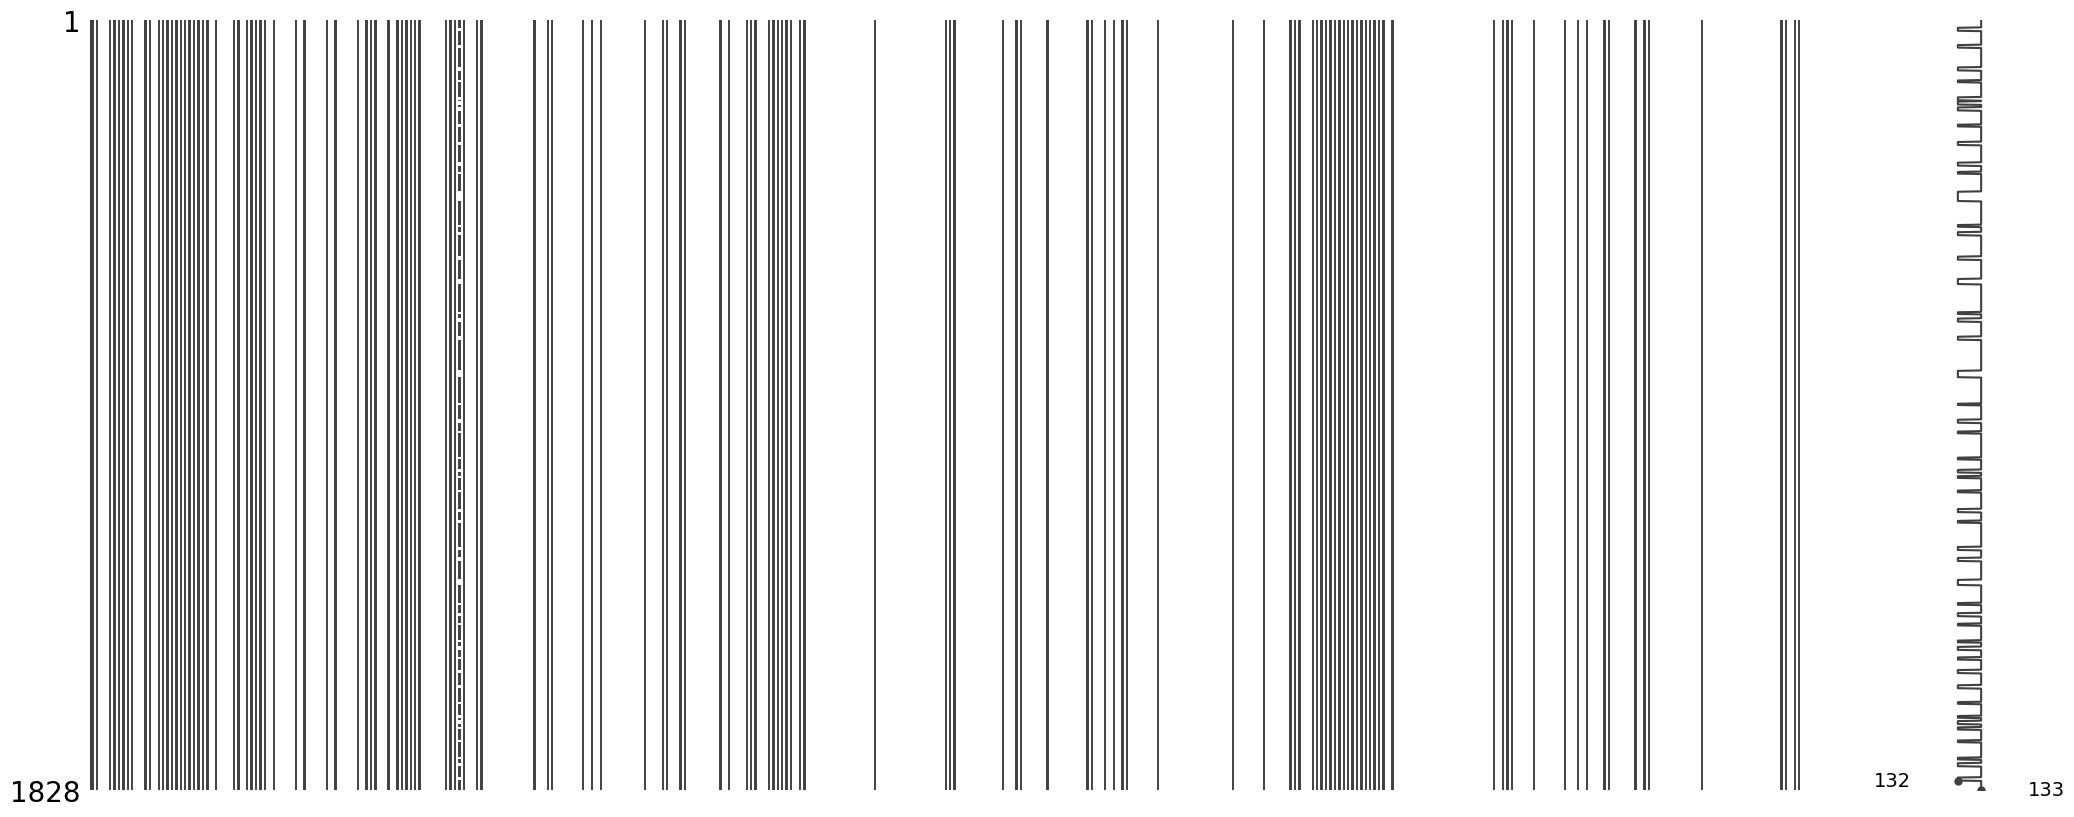

In [12]:
import missingno as msno
%matplotlib inline
msno.matrix(df_ek)

# Data Cleansing

## initial cleaning

In [13]:
df = df_ek.copy()

In [14]:
# Spalten die nur NAN enthalten entfernen
df = df.dropna(axis=1, how='all')

# Spalten die ausschließlich XY Werte enthalten (0 / X / 1 / etc.) dropen
df = df.loc[:, (df.astype(str) != 0).any(axis=0)]
df = df.loc[:, (df.astype(str) != '0,0').any(axis=0)]
df = df.loc[:, (df.astype(str) != '0,00').any(axis=0)]
df = df.loc[:, (df.astype(str) != '0,000').any(axis=0)]
df = df.loc[:, (df.astype(str) != 'X').any(axis=0)]
df = df.loc[:, (df.astype(str) != '1').any(axis=0)]

#spaletn entfernen die immer die selben Werte enthalten
keep_columns = [col for col in df.columns if len(df[col].unique()) > 1]
df = df[keep_columns].copy()

#print(len(df_io.index))
df.shape

(1828, 32)

In [15]:
df.head(4)

,EBELN,EBELP,AEDAT_x,TXZ01,MATNR,EMATN,BUKRS_x,WERKS,MATKL,INFNR,MENGE,MEINS,BPRME,NETPR,NETWR,BRTWR,LMEIN,PRDAT,EFFWR,GEWEI,KO_PRCTR,BANFN,BONBA,BUKRS_y,AEDAT_y,ERNAM,LPONR,LIFNR,EKORG,EKGRP,BEDAT,KNUMV
0,4500000000,10,2021-01-25,Nuts,FF-R01,FF-R01,FF,FF,FF-MANUF,5300000050,41940,KG,KG,1.82,76330.8,76330.8,KG,2021-01-25,76330.8,KG,FF,10000004,76330.8,FF,2021-01-25,F3,60,V01,FF,100,2021-01-25,1000000000
1,4500000000,20,2021-01-25,Blueberries,FF-R02,FF-R02,FF,FF,FF-MANUF,5300000051,14280,KG,KG,4.00,57120.0,57120.0,KG,2021-01-25,57120.0,KG,FF,10000005,57120.0,FF,2021-01-25,F3,60,V01,FF,100,2021-01-25,1000000000
2,4500000000,30,2021-01-25,Strawberries,FF-R03,FF-R03,FF,FF,FF-MANUF,5300000052,14280,KG,KG,4.02,57405.6,57405.6,KG,2021-01-25,57405.6,KG,FF,10000006,57405.6,FF,2021-01-25,F3,60,V01,FF,100,2021-01-25,1000000000
3,4500000000,40,2021-01-25,Raisins,FF-R04,FF-R04,FF,FF,FF-MANUF,5300000053,39900,KG,KG,1.07,42693.0,42693.0,KG,2021-01-25,42693.0,KG,FF,10000007,42693.0,FF,2021-01-25,F3,60,V01,FF,100,2021-01-25,1000000000


In [17]:
#sanity check
df.shape

(1828, 32)

# manual cleaning of plant dependent naming

In [19]:
df.drop(['BUKRS_x', 'BUKRS_y', 'WERKS', 'KO_PRCTR', 'EKORG'],axis=1, inplace=True)

In [18]:
df.EMATN = df.EMATN.str.slice(3)
df.MATNR = df.MATNR.str.slice(3)
df.MATKL = df.MATKL.str.slice(3)

## data types correction

In [21]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
EBELN,1828.0,NaN,NaN,NaN,4500000229.663567,4500000000.0,4500000115.0,4500000230.5,4500000343.0,4500000459.0,132.148206
EBELP,1828.0,NaN,NaN,NaN,28.490153,10.0,10.0,20.0,40.0,70.0,15.984955
AEDAT_x,1828,NaN,NaN,NaN,2021-01-29 16:12:51.991247360,2021-01-25 00:00:00,2021-01-25 00:00:00,2021-01-28 00:00:00,2021-02-01 00:00:00,2021-02-04 00:00:00,NaN
TXZ01,1828,10,Wheat,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MATNR,1828,10,R05,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMATN,1828,10,R05,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MATKL,1828,1,MANUF,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INFNR,1828.0,NaN,NaN,NaN,5300000049.556346,5300000000.0,5300000026.0,5300000048.0,5300000074.0,5300000097.0,27.487263
MENGE,1828.0,NaN,NaN,NaN,86510.536105,200.0,16497.5,47240.0,135000.0,432000.0,90912.266401
MEINS,1828,2,KG,1228,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.head(10)

,EBELN,EBELP,AEDAT_x,TXZ01,MATNR,EMATN,MATKL,INFNR,MENGE,MEINS,BPRME,NETPR,NETWR,BRTWR,LMEIN,PRDAT,EFFWR,GEWEI,BANFN,BONBA,AEDAT_y,ERNAM,LPONR,LIFNR,EKGRP,BEDAT,KNUMV
0,4500000000,10,2021-01-25,Nuts,R01,R01,MANUF,5300000050,41940,KG,KG,1.82,76330.8,76330.8,KG,2021-01-25,76330.8,KG,10000004,76330.8,2021-01-25,F3,60,V01,100,2021-01-25,1000000000
1,4500000000,20,2021-01-25,Blueberries,R02,R02,MANUF,5300000051,14280,KG,KG,4.00,57120.0,57120.0,KG,2021-01-25,57120.0,KG,10000005,57120.0,2021-01-25,F3,60,V01,100,2021-01-25,1000000000
2,4500000000,30,2021-01-25,Strawberries,R03,R03,MANUF,5300000052,14280,KG,KG,4.02,57405.6,57405.6,KG,2021-01-25,57405.6,KG,10000006,57405.6,2021-01-25,F3,60,V01,100,2021-01-25,1000000000
3,4500000000,40,2021-01-25,Raisins,R04,R04,MANUF,5300000053,39900,KG,KG,1.07,42693.0,42693.0,KG,2021-01-25,42693.0,KG,10000007,42693.0,2021-01-25,F3,60,V01,100,2021-01-25,1000000000
4,4500000000,50,2021-01-25,Wheat,R05,R05,MANUF,5300000054,123000,KG,KG,0.99,121770.0,121770.0,KG,2021-01-25,121770.0,KG,10000008,121770.0,2021-01-25,F3,60,V01,100,2021-01-25,1000000000
5,4500000000,60,2021-01-25,Oats,R06,R06,MANUF,5300000055,192600,KG,KG,0.92,177192.0,177192.0,KG,2021-01-25,177192.0,KG,10000009,177192.0,2021-01-25,F3,60,V01,100,2021-01-25,1000000000
6,4500000001,10,2021-01-25,Large Box (1kg),P01,P01,MANUF,5300000056,324000,ST,ST,0.28,90720.0,90720.0,ST,2021-01-25,90720.0,KG,10000000,90720.0,2021-01-25,F3,40,V02,200,2021-01-25,1000000001
7,4500000001,20,2021-01-25,Large Bag (1kg),P02,P02,MANUF,5300000057,324000,ST,ST,0.12,38880.0,38880.0,ST,2021-01-25,38880.0,KG,10000001,38880.0,2021-01-25,F3,40,V02,200,2021-01-25,1000000001
8,4500000001,30,2021-01-25,Small Box (500g),P03,P03,MANUF,5300000058,204000,ST,ST,0.21,42840.0,42840.0,ST,2021-01-25,42840.0,KG,10000002,42840.0,2021-01-25,F3,40,V02,200,2021-01-25,1000000001
9,4500000001,40,2021-01-25,Small Bag (500g),P04,P04,MANUF,5300000059,204000,ST,ST,0.09,18360.0,18360.0,ST,2021-01-25,18360.0,KG,10000003,18360.0,2021-01-25,F3,40,V02,200,2021-01-25,1000000001


In [25]:
cont_Cols = ['EBELN', 'EBELP']

cat_Cols = ['TXZ01', 'MATNR', 'EMATN', 'MATKL', 'INFNR', 'MEINS', 'BPRME', 'LMEIN', 'GEWEI', 'BANFN', 'ERNAM', 'LPONR', 'LIFNR', 'EKGRP', 'KNUMV' ]

num_Cols = ['MENGE', 'NETPR', 'NETWR', 'BRTWR', 'EFFWR', 'BONBA']

dat_Cols = ['BEDAT', 'PRDAT', 'AEDAT_x', 'AEDAT_y']

#2 Del
#BUZEI, POSN2, EBELP

In [26]:
#sanity check of cols
print(len(cont_Cols)+len(cat_Cols)+len(num_Cols)+len(dat_Cols))
print(df.shape[1]) 

27
27


In [27]:
# Change dtype to Category for relevant features
df_cor = df.copy()
df_cor.head()

# we have to change NaN top 0 to avoid the infer dtype "object" for some cols
#df_cor['ZUONR'] = df_cor['ZUONR'].fillna(0)


# change Dtype to Cat for categorical columns
cats_cat = df_cor[cat_Cols]
        
for (columnName, columnData) in cats_cat.items():
    df_cor[columnName] = df_cor[columnName].astype(str)
    if isinstance(df_cor[columnName][0], str):
        s = pd.Series(df_cor[columnName], dtype="category")
        df_cor[columnName] = df_cor[columnName].astype('category')



In [28]:
#check 1
df_cor.dtypes

EBELN               int64
EBELP               int64
AEDAT_x    datetime64[ns]
TXZ01            category
MATNR            category
EMATN            category
MATKL            category
INFNR            category
MENGE               int64
MEINS            category
BPRME            category
NETPR             float64
NETWR             float64
BRTWR             float64
LMEIN            category
PRDAT      datetime64[ns]
EFFWR             float64
GEWEI            category
BANFN            category
BONBA             float64
AEDAT_y    datetime64[ns]
ERNAM            category
LPONR            category
LIFNR            category
EKGRP            category
BEDAT      datetime64[ns]
KNUMV            category
dtype: object

In [29]:
#check 2
print('Categorical columns: {}'.format(list(df_cor.select_dtypes('category').columns)))

Categorical columns: ['TXZ01', 'MATNR', 'EMATN', 'MATKL', 'INFNR', 'MEINS', 'BPRME', 'LMEIN', 'GEWEI', 'BANFN', 'ERNAM', 'LPONR', 'LIFNR', 'EKGRP', 'KNUMV']


In [30]:
#check 3
df_cor.shape

(1828, 27)

<Axes: >

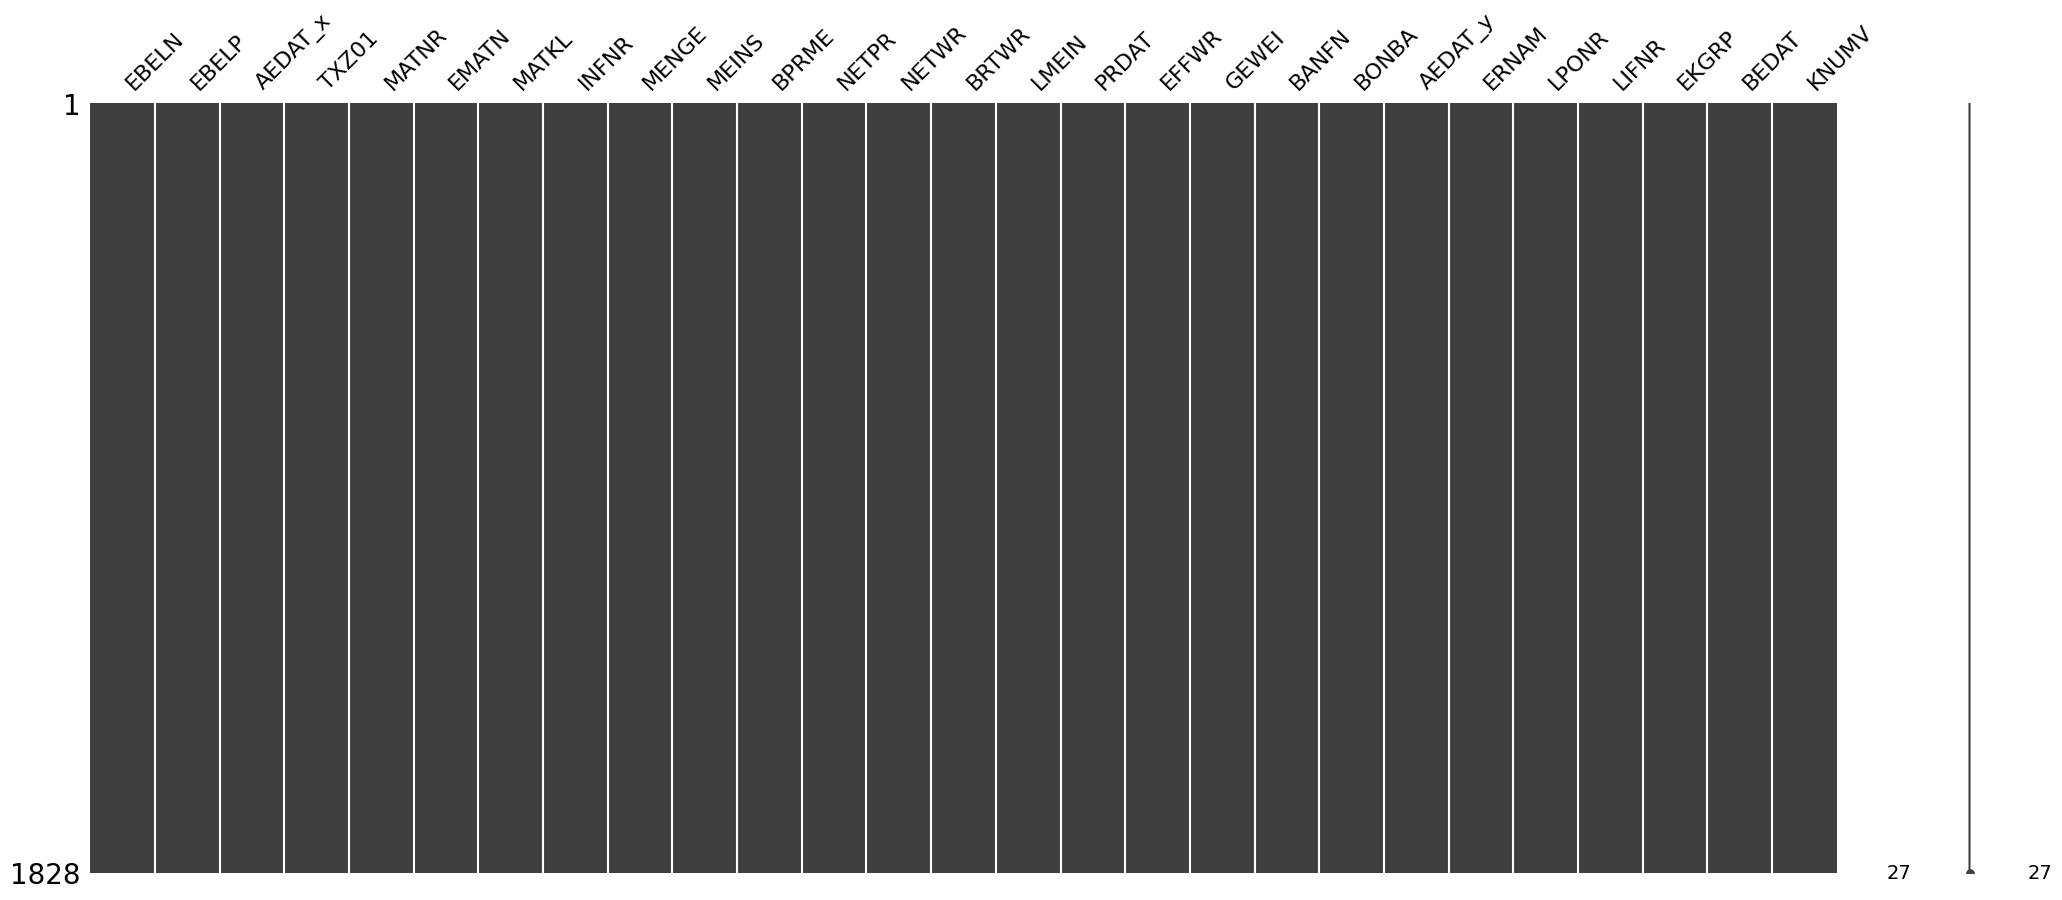

In [31]:
import missingno as msno
%matplotlib inline
msno.matrix(df_cor)

In [32]:
df_cor.to_feather('../Data/D3_EKKO-EKPO_raw.ftr')

# lets check the dataset properities / Correlation  / distribution

<Axes: >

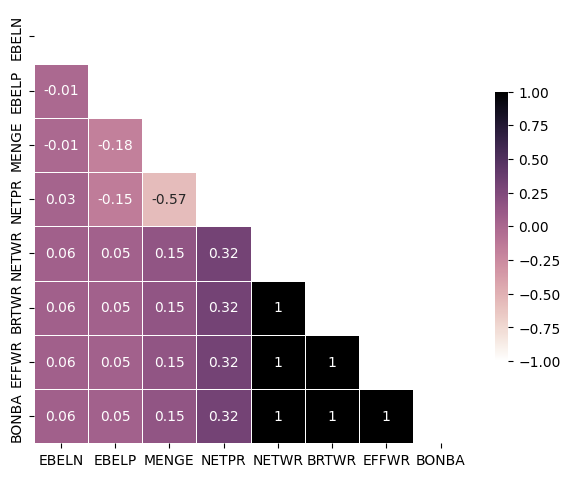

In [33]:
# Compute the corr matrix, only for numerics since we use category dtype
corr = df_cor.corr(numeric_only=True).round(2)

# Set up the triangular mask / matplotlib figure / Colors
mask = np.triu(np.ones_like(corr, dtype=bool)) # tril for upper
f, ax = plt.subplots(figsize=(7, 7))
cmap1 = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap1, vmax=1,vmin=-1, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})


<Axes: >

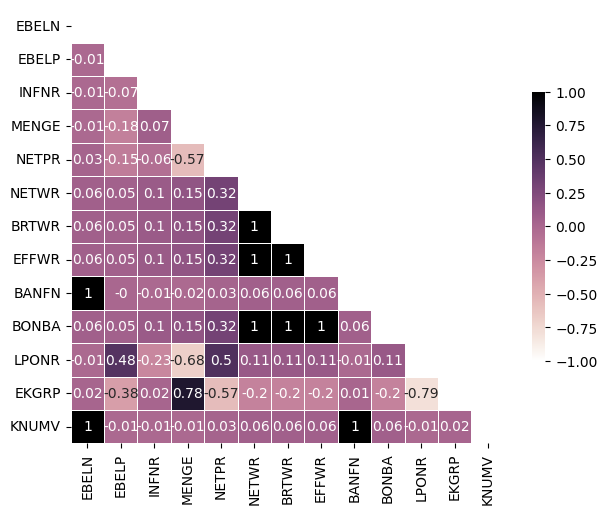

In [34]:

# Compute the corr matrix and 
corr = df.corr(numeric_only=True).round(2)

# Set up the triangular mask / matplotlib figure / Colors
mask = np.triu(np.ones_like(corr, dtype=bool)) # tril for upper
f, ax = plt.subplots(figsize=(7, 7))
cmap1 = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap1, vmax=1,vmin=-1, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})


In [39]:
df.sample(10)

,EBELN,EBELP,TXZ01,MATNR,EMATN,INFNR,MENGE,MEINS,BPRME,NETPR,NETWR,BRTWR,LMEIN,EFFWR,BANFN,BONBA,ERNAM,LPONR,LIFNR,EKGRP,KNUMV,BEDAT
60,4500000018,40,Raisins,AA-R04,AA-R04,5300000003,11200,KG,KG,1.26,14112.0,14112.0,KG,14112.0,10000070,14112.0,A2,60,V01,100,1000000018,2021-03-23
152,4500000043,20,Blueberries,AA-R02,AA-R02,5300000001,4800,KG,KG,5.21,25008.0,25008.0,KG,25008.0,10000170,25008.0,A2,60,V01,100,1000000043,2021-03-23
38,4500000010,20,Wheat,AA-R05,AA-R05,5300000004,17850,KG,KG,0.82,14637.0,14637.0,KG,14637.0,10000048,14637.0,A2,30,V01,100,1000000010,2021-03-23
157,4500000044,10,Large Box (1kg),AA-P01,AA-P01,5300000006,64000,ST,ST,0.34,21760.0,21760.0,ST,21760.0,10000167,21760.0,A2,20,V02,200,1000000044,2021-03-23
99,4500000029,10,Nuts,AA-R01,AA-R01,5300000000,6400,KG,KG,2.30,14720.0,14720.0,KG,14720.0,10000117,14720.0,A2,60,V01,100,1000000029,2021-03-23
131,4500000037,50,Wheat,AA-R05,AA-R05,5300000004,18550,KG,KG,1.26,23373.0,23373.0,KG,23373.0,10000149,23373.0,A2,60,V01,100,1000000037,2021-03-23
139,4500000039,50,Wheat,AA-R05,AA-R05,5300000004,39200,KG,KG,1.33,52136.0,52136.0,KG,52136.0,10000157,52136.0,A2,60,V01,100,1000000039,2021-03-23
161,4500000045,30,Strawberries,AA-R03,AA-R03,5300000002,1200,KG,KG,5.90,7080.0,7080.0,KG,7080.0,10000179,7080.0,A2,60,V01,100,1000000045,2021-03-23
32,4500000008,10,Blueberries,AA-R02,AA-R02,5300000001,12300,KG,KG,4.22,51906.0,51906.0,KG,51906.0,10000042,51906.0,A2,30,V01,100,1000000008,2021-03-23
147,4500000041,50,Wheat,AA-R05,AA-R05,5300000004,4900,KG,KG,1.29,6321.0,6321.0,KG,6321.0,10000165,6321.0,A2,60,V01,100,1000000041,2021-03-23


In [35]:
#manually delete the hihgly correlating features in both dataframes
# WRBTR PSWBT VBEL2 POSN2 ERFMG AUFPL SAKNR SAKNR LOKKT KIDNO
df_cor = df_cor.drop(['KNUMV'], axis=1)
df = df.drop(['KNUMV'], axis=1)

df_cor = df_cor.drop(['BRTWR'], axis=1)
df = df.drop(['BRTWR'], axis=1)

df_cor = df_cor.drop(['EFFWR'], axis=1)
df = df.drop(['EFFWR'], axis=1)

df_cor = df_cor.drop(['BONBA'], axis=1)
df = df.drop(['BONBA'], axis=1)



In [36]:
df.head()

,EBELN,EBELP,AEDAT_x,TXZ01,MATNR,EMATN,MATKL,INFNR,MENGE,MEINS,BPRME,NETPR,NETWR,LMEIN,PRDAT,GEWEI,BANFN,AEDAT_y,ERNAM,LPONR,LIFNR,EKGRP,BEDAT
0,4500000000,10,2021-01-25,Nuts,R01,R01,MANUF,5300000050,41940,KG,KG,1.82,76330.8,KG,2021-01-25,KG,10000004,2021-01-25,F3,60,V01,100,2021-01-25
1,4500000000,20,2021-01-25,Blueberries,R02,R02,MANUF,5300000051,14280,KG,KG,4.00,57120.0,KG,2021-01-25,KG,10000005,2021-01-25,F3,60,V01,100,2021-01-25
2,4500000000,30,2021-01-25,Strawberries,R03,R03,MANUF,5300000052,14280,KG,KG,4.02,57405.6,KG,2021-01-25,KG,10000006,2021-01-25,F3,60,V01,100,2021-01-25
3,4500000000,40,2021-01-25,Raisins,R04,R04,MANUF,5300000053,39900,KG,KG,1.07,42693.0,KG,2021-01-25,KG,10000007,2021-01-25,F3,60,V01,100,2021-01-25
4,4500000000,50,2021-01-25,Wheat,R05,R05,MANUF,5300000054,123000,KG,KG,0.99,121770.0,KG,2021-01-25,KG,10000008,2021-01-25,F3,60,V01,100,2021-01-25


<Axes: >

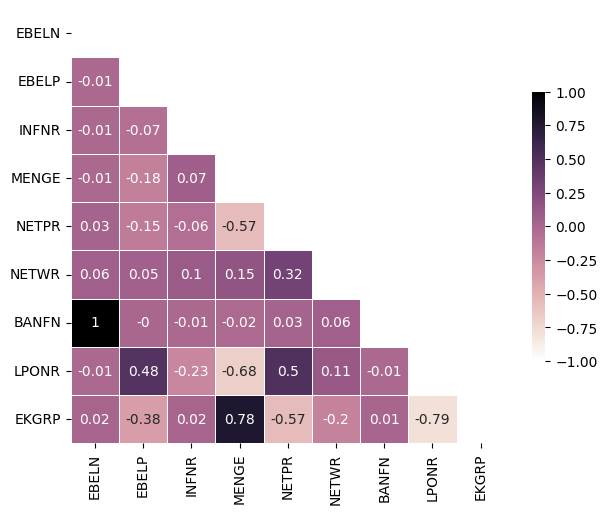

In [37]:
# Compute the corr matrix and 
corr = df.corr(numeric_only=True).round(2)

# Set up the triangular mask / matplotlib figure / Colors
mask = np.triu(np.ones_like(corr, dtype=bool)) # tril for upper
f, ax = plt.subplots(figsize=(7, 7))
cmap1 = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap1, vmax=1,vmin=-1, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})


In [38]:
df_cor.head()

,EBELN,EBELP,AEDAT_x,TXZ01,MATNR,EMATN,MATKL,INFNR,MENGE,MEINS,BPRME,NETPR,NETWR,LMEIN,PRDAT,GEWEI,BANFN,AEDAT_y,ERNAM,LPONR,LIFNR,EKGRP,BEDAT
0,4500000000,10,2021-01-25,Nuts,R01,R01,MANUF,5300000050,41940,KG,KG,1.82,76330.8,KG,2021-01-25,KG,10000004,2021-01-25,F3,60,V01,100,2021-01-25
1,4500000000,20,2021-01-25,Blueberries,R02,R02,MANUF,5300000051,14280,KG,KG,4.00,57120.0,KG,2021-01-25,KG,10000005,2021-01-25,F3,60,V01,100,2021-01-25
2,4500000000,30,2021-01-25,Strawberries,R03,R03,MANUF,5300000052,14280,KG,KG,4.02,57405.6,KG,2021-01-25,KG,10000006,2021-01-25,F3,60,V01,100,2021-01-25
3,4500000000,40,2021-01-25,Raisins,R04,R04,MANUF,5300000053,39900,KG,KG,1.07,42693.0,KG,2021-01-25,KG,10000007,2021-01-25,F3,60,V01,100,2021-01-25
4,4500000000,50,2021-01-25,Wheat,R05,R05,MANUF,5300000054,123000,KG,KG,0.99,121770.0,KG,2021-01-25,KG,10000008,2021-01-25,F3,60,V01,100,2021-01-25


In [39]:
df_cor.to_feather('../Data/D3_EKKO-EKPO_cleaned.ftr')